In [55]:
import sys
import re

strCLGs = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/CLG/CLG.bfl-cent.mbh.msynt'
strGar_CLG = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/CLG/deut.b.clusters.txt.filt.gar'
strCmpData = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/ambMex_lepOcu.mutual.chr.list'
strChromSizes_ambMex = '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/ambMex/chromSizes.txt'


clg_data = dict()
chrSizes_CLG = {'order': [], 'chromosomes': dict()}
print(f"Reading the CLG data from '{strCLGs}'", file=sys.stderr)
with(open(strCLGs, 'r')) as hFile:
    for line in hFile.readlines():
        clg_id, clg_name, _, pos, _, clg_idx = line.strip().split('\t')
        clg_data[clg_name] = {'name': clg_id, 'position': int(pos), 'index': int(clg_idx)}
        
        cm = chrSizes_CLG['chromosomes'].get(clg_id)
        if not cm or cm < int(pos):
            chrSizes_CLG['chromosomes'][clg_id] = int(pos)
        if not clg_id in chrSizes_CLG['order']:
            chrSizes_CLG['order'].append(clg_id)
chrSizes_CLG['order'] = sorted(chrSizes_CLG['order'])
print(f"   Loaded {len(clg_data)} CLGs", file=sys.stderr)


gar_data = dict()
print(f"Reading the gar data from '{strGar_CLG}'", file=sys.stderr)
with(open(strGar_CLG, 'r')) as hFile:
    for line in hFile.readlines():
        cols = line.strip().split('\t')
        for id in cols[3:]:
            gar_data[id] = {'CLG name': cols[1], 'CLG ID': cols[2]}
print(f"   Loaded {len(gar_data)} gar proteins", file=sys.stderr)          


chrSizes_ambMex = {'order': [], 'chromosomes': dict()}
print(f"Reading chrom size data from '{strChromSizes_ambMex}'", file=sys.stderr)
with(open(strChromSizes_ambMex, 'r')) as hFile:
    for line in hFile.readlines():
        chrName, chrLen = line.strip().split('\t')
        chrSizes_ambMex['chromosomes'][chrName] = int(chrLen)
        chrSizes_ambMex['order'].append(chrName)

Reading the CLG data from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/CLG/CLG.bfl-cent.mbh.msynt'
   Loaded 6843 CLGs
Reading the gar data from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/CLG/deut.b.clusters.txt.filt.gar'
   Loaded 8298 gar proteins
Reading chrom size data from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/data/ambMex/chromSizes.txt'


In [56]:
def calculateOffset(strChr, chrSizes):
    iOffset = 0
    for x in chrSizes['order']:
        if x == strChr:
            return iOffset
        else:
            iOffset += chrSizes['chromosomes'][x]
    print(f'ERROR: {strChr} not found in {chrSizes}')
      
    
x_data = []
y_data = []
colors = []
oleg_colors = { 'CLGA': [0.8941176,0.1019608,0.10980392],
                'CLGB': [0.5529412,0.2980392,0.41568627],
                'CLGC': [0.2156863,0.4941176,0.72156863],
                'CLGD': [0.2549020,0.5882353,0.50588235],
                'CLGE': [0.3019608,0.6862745,0.29019608],
                'CLGF': [0.4470588,0.4941176,0.46274510],
                'CLGG': [0.5960784,0.3058824,0.63921569],
                'CLGH': [0.7960784,0.4000000,0.31764706],
                'CLGI': [1.0000000,0.4980392,0.00000000],
                'CLGJ': [1.0000000,0.7490196,0.09803922],
                'CLGK': [1.0000000,1.0000000,0.20000000],
                'CLGL': [0.8235294,0.6666667,0.17647059],
                'CLGM': [0.6509804,0.3372549,0.15686275],
                'CLGN': [0.8078431,0.4196078,0.45098039],
                'CLGO': [0.9686275,0.5058824,0.74901961],
                'CLGP': [0.7843137,0.5529412,0.67450980],
                'CLGQ': [0.6000000,0.6000000,0.60000000],
                'CLGR': [0.2000000,0.6000000,0.60000000],
                'CLGS': [0.6000000,0.2000000,0.20000000],
                'CLGT': [0.2000000,0.2000000,0.20000000]}
print(f"Reading the blast results from '{strCmpData}'", file=sys.stderr)
with(open(strCmpData, 'r')) as hFile:
    for line in hFile.readlines():
        ambMex_chr, ambMex_pos, lepOcu_chr, lepOcu_pos = line.strip().split('\t')
        # If the lepOcu chromosome is present in gar_data, replace it with the CLG information, otherwise, skip it
        gd = gar_data.get(lepOcu_chr)
        if gd:
            clg = clg_data.get(gd['CLG ID'])
            if clg:
                m = re.search('^([^:]+):([0-9]+)-([0-9]+)$', ambMex_pos)
                chr_x = m.group(1)
                start_x = int(m.group(2))
                end_x = int(m.group(3))
                x_data.append( start_x + calculateOffset(chr_x, chrSizes_ambMex) )
                
                chr_y = clg['name']
                start_y = clg['position']
                y_data.append( start_y + calculateOffset(chr_y, chrSizes_CLG) )
                
                colors.append(oleg_colors[gd['CLG name']])

Reading the blast results from '/groups/tanaka/Projects/axolotl-genome/AmexG_v6.0/AmexG_v6.0_DD/work/manuscript/rebuttal/synteny/ambMex_lepOcu.mutual.chr.list'


Text(0.5, 0, 'CLG')

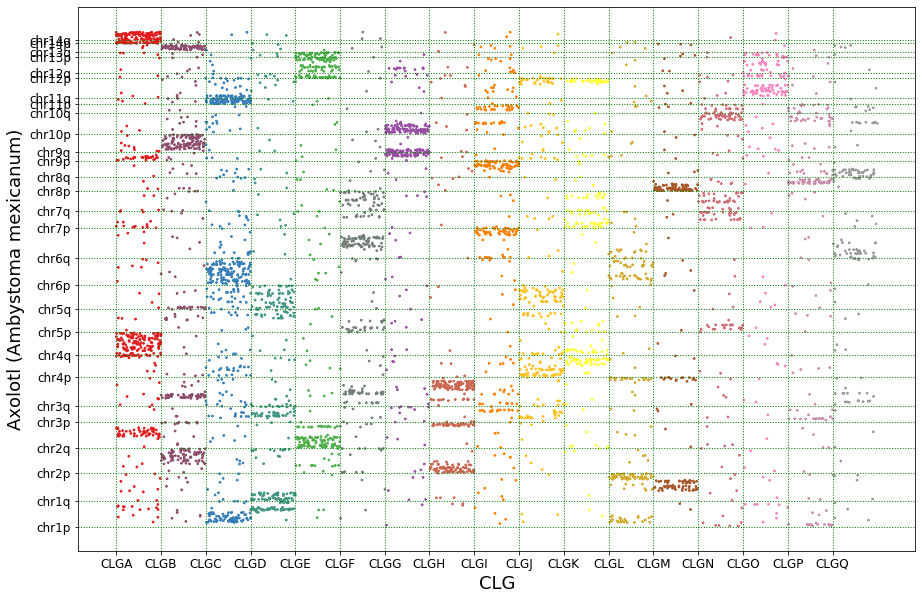

In [72]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
plt.scatter(y_data, x_data, c=colors, s=3)
y_ticks = []
y_ticks_labels = []

for y in chrSizes_ambMex['order']:
    iOffset = calculateOffset(y, chrSizes_ambMex)
    plt.axhline(iOffset, linestyle='dotted', color='green', linewidth=1)
    y_ticks.append(iOffset)
    y_ticks_labels.append(y)
plt.yticks(y_ticks, y_ticks_labels, fontsize=12)
plt.ylabel('Axolotl (Ambystoma mexicanum)', fontsize=18)
    
x_ticks = []
x_ticks_labels = []
for x in chrSizes_CLG['order']:
    iOffset = calculateOffset(x, chrSizes_CLG)
    plt.axvline(iOffset, linestyle='dotted', color='green', linewidth=1)
    x_ticks.append(iOffset)
    x_ticks_labels.append(x)
plt.xticks(x_ticks, x_ticks_labels, fontsize=12)
plt.xlabel('CLG', fontsize=18)
